In [1]:
import requests
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import shutil
from PIL import Image

In [14]:
# For a zoom level z and search depth factor d, 
# this script uses 9z^2 requests to Strava URLs
zoom_level = 3
search_depth_factor = 3

def get_coord_str(long, lat, zoom, sep="/"):
    return str(zoom) + sep + str(long) + sep + str(lat)

def get_url(long, lat, zoom):
    return "https://heatmap-external-c.strava.com/tiles/all/hot/" + \
            get_coord_str(long, lat, zoom) + ".png?v=19"

def get_image_filename(long, lat, zoom):
    return get_coord_str(long, lat, zoom, sep="_") + ".png"

def request_image(long, lat, zoom_level):
    url = get_url(long, lat, zoom_level)
    print("Requesting", url)
    path = get_image_filename(long, lat, zoom_level)
    r = requests.get(url, stream=True)
    if r.status_code == 200:
        with open(path, 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)
        print("Wrote file", path)
        return True
    return False
    
map_hierarchy = {}
im_shape = None
for long in range(zoom_level * search_depth_factor):
    for lat in range(zoom_level * search_depth_factor):
        success = request_image(long, lat, zoom_level)
        if success:
            if lat not in map_hierarchy:
                map_hierarchy[lat] = []
            map_hierarchy[lat].append(long)
            if im_shape is None:
                path = get_image_filename(long, lat, zoom_level)
                im = Image.open(path)
                im_shape = np.array(im).shape

Requesting https://heatmap-external-c.strava.com/tiles/all/hot/3/0/0.png?v=19
Requesting https://heatmap-external-c.strava.com/tiles/all/hot/3/0/1.png?v=19
Wrote file 3_0_1.png
Requesting https://heatmap-external-c.strava.com/tiles/all/hot/3/0/2.png?v=19
Wrote file 3_0_2.png
Requesting https://heatmap-external-c.strava.com/tiles/all/hot/3/0/3.png?v=19
Wrote file 3_0_3.png
Requesting https://heatmap-external-c.strava.com/tiles/all/hot/3/0/4.png?v=19
Wrote file 3_0_4.png
Requesting https://heatmap-external-c.strava.com/tiles/all/hot/3/0/5.png?v=19
Wrote file 3_0_5.png
Requesting https://heatmap-external-c.strava.com/tiles/all/hot/3/0/6.png?v=19
Requesting https://heatmap-external-c.strava.com/tiles/all/hot/3/0/7.png?v=19
Requesting https://heatmap-external-c.strava.com/tiles/all/hot/3/0/8.png?v=19
Requesting https://heatmap-external-c.strava.com/tiles/all/hot/3/1/0.png?v=19
Requesting https://heatmap-external-c.strava.com/tiles/all/hot/3/1/1.png?v=19
Wrote file 3_1_1.png
Requesting https

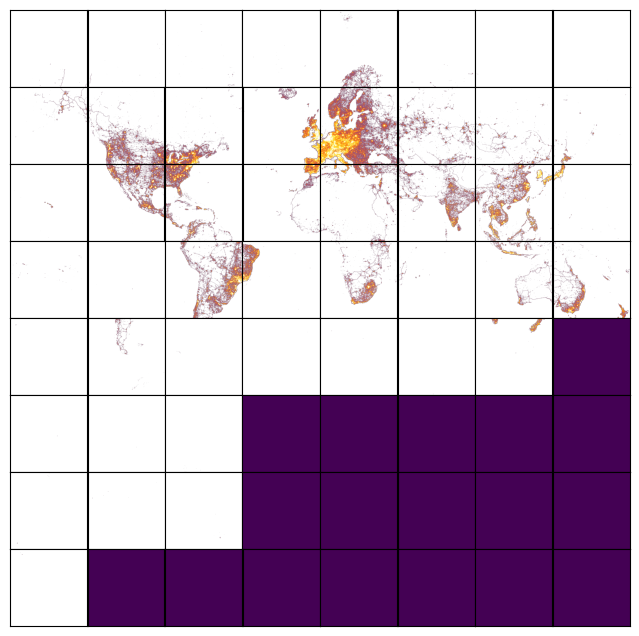

In [17]:
nrows = len(map_hierarchy.keys())
ncols = max([len(map_hierarchy[k]) for k in map_hierarchy])
plt.figure(figsize=(ncols, nrows))
gs = gridspec.GridSpec(nrows, ncols)
i = 0
blank_im = np.zeros(im_shape)

def plot_img(gs, img, ind):
    ax = plt.subplot(gs[ind])
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

for k in map_hierarchy:
    j = 0
    #while j < k:
    #    plot_img(gs, blank_im, i * ncols + j)
    #    j += 1
    for long in map_hierarchy[k]:
        im = get_image_filename(long, k, zoom_level)
        im = Image.open(im)
        plot_img(gs, im, i * ncols + j)
        j += 1
    for jj in range(j, ncols):
        plot_img(gs, blank_im, i * ncols + jj)
    i += 1
gs.update(wspace=0, hspace=0)
plt.show()